In [72]:
# Librerias Basicas
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\Rubén\Documents\DATA ANALIST\git\TareasEBACmx\ProyectoFinal-EmpresaAliada")

# Carga de Datos

In [73]:
base_path = r"C:\Users\Rubén\Documents\DATA ANALIST\git\TareasEBACmx\ProyectoFinal-EmpresaAliada\DATA\csv"
dim_calendar = pd.read_csv(f"{base_path}\\DIM_CALENDAR.csv")
dim_category = pd.read_csv(f"{base_path}\\DIM_CATEGORY.csv")
dim_product  = pd.read_csv(f"{base_path}\\DIM_PRODUCT.csv")
dim_segment  = pd.read_csv(f"{base_path}\\DIM_SEGMENT.csv")
fact_sales   = pd.read_csv(f"{base_path}\\FACT_SALES.csv")
dim_calendar.head()


,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,01-21,2021,1,1,10/01/2021
1,02-21,2021,1,2,17/01/2021
2,03-21,2021,1,3,24/01/2021
3,04-21,2021,1,4,31/01/2021
4,05-21,2021,2,5,07/02/2021


# ANALISIS EDA

In [74]:
# Eliminar duplicados
fact_sales.drop_duplicates(inplace=True)

# Convertir fechas
dim_calendar['DATE'] = pd.to_datetime(dim_calendar['DATE'], format='%d/%m/%Y')

# Asegurar tipos numéricos
fact_sales['TOTAL_VALUE_SALES'] = pd.to_numeric(
    fact_sales['TOTAL_VALUE_SALES'], errors='coerce'
)

fact_sales['TOTAL_UNIT_SALES'] = pd.to_numeric(
    fact_sales['TOTAL_UNIT_SALES'], errors='coerce'
)

In [75]:
# Crear DataFrame consolidado
df = fact_sales \
    .merge(dim_product, left_on='ITEM_CODE', right_on='ITEM', how='left') \
    .merge(dim_category, left_on='CATEGORY', right_on='ID_CATEGORY', how='left') \
    .merge(dim_calendar, on='WEEK', how='left')
df.head()

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,FORMAT,ATTR1,ATTR2,ATTR3,ID_CATEGORY,CATEGORY_y,YEAR,MONTH,WEEK_NUMBER,DATE
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28


In [76]:
# Verificacion de Datos en el DataFrame consolidado
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   WEEK                         122002 non-null  object        
 1   ITEM_CODE                    122002 non-null  object        
 2   TOTAL_UNIT_SALES             122002 non-null  float64       
 3   TOTAL_VALUE_SALES            122002 non-null  float64       
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64       
 5   REGION                       122002 non-null  object        
 6   MANUFACTURER                 122002 non-null  object        
 7   BRAND                        122002 non-null  object        
 8   ITEM                         122002 non-null  object        
 9   ITEM_DESCRIPTION             122002 non-null  object        
 10  CATEGORY_x                   122002 non-null  int64         
 11  FORMAT                    

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,FORMAT,ATTR1,ATTR2,ATTR3,ID_CATEGORY,CATEGORY_y,YEAR,MONTH,WEEK_NUMBER,DATE
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2,AIR CARE,2022,8,34,2022-08-28


In [77]:
# Creacion de un nuevo DataFrame con las columnas necesarias (evitamos columnas innecesarias para facil manejo en looker Studio)
cols_needed = [
    'WEEK',
    'TOTAL_UNIT_SALES',
    'TOTAL_VALUE_SALES',
    'TOTAL_UNIT_AVG_WEEKLY_SALES',
    'REGION',
    'MANUFACTURER',
    'BRAND',
    'ITEM_DESCRIPTION',
    'DATE'
]

df2 = df[cols_needed].copy()

# Eliminar duplicados
df2.drop_duplicates(inplace=True)

# Asegurar tipos correctos
df2['DATE'] = pd.to_datetime(df2['DATE'])

numeric_cols = [
    'TOTAL_UNIT_SALES',
    'TOTAL_VALUE_SALES',
    'TOTAL_UNIT_AVG_WEEKLY_SALES'
]

for col in numeric_cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    # Exportacion para su uso en looker Studio
df2.to_csv("C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\ProyectoFinal-EmpresaAliada\\Python\\FACT_SALES_CONSOLIDATED.csv", index=False)

In [78]:
# Exportacion para su uso en looker Studio
df.to_csv("C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\ProyectoFinal-EmpresaAliada\\Looker Studio\\FACT_SALES_CONSOLIDATED.csv", index=False)

# Visualizacion de datos

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

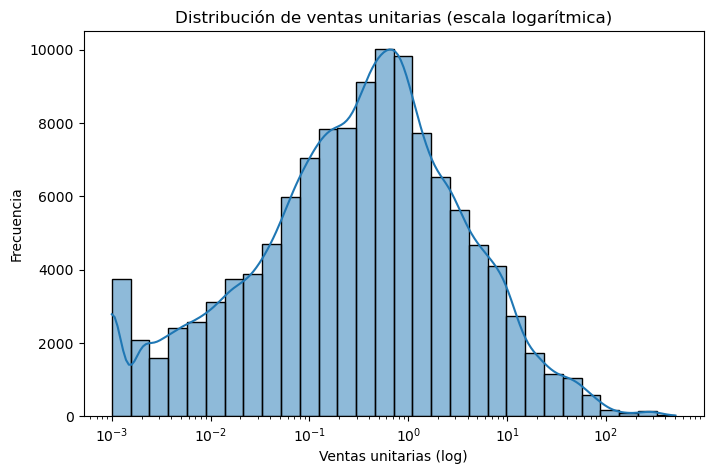

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(
    df['TOTAL_UNIT_SALES'][df['TOTAL_UNIT_SALES'] > 0],
    bins=30,
    kde=True,
    log_scale=True
)
plt.title('Distribución de ventas unitarias (escala logarítmica)')
plt.xlabel('Ventas unitarias (log)')
plt.ylabel('Frecuencia')
plt.show()


) missing from font(s) DejaVu Sans.ackages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


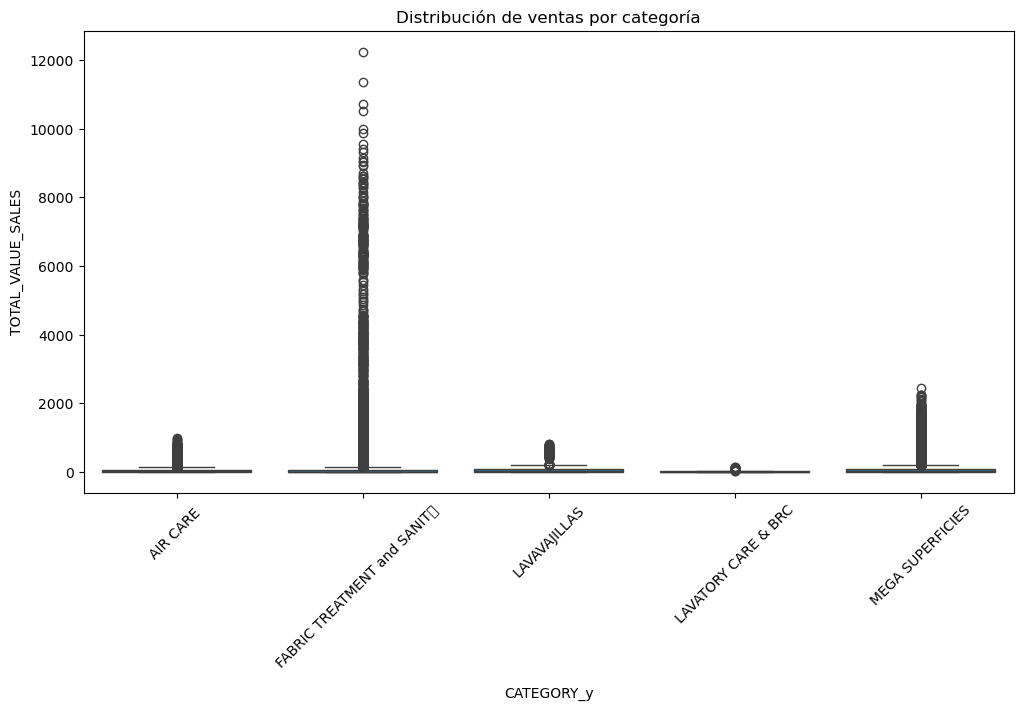

In [81]:
plt.figure(figsize=(12,6))
sns.boxplot(x='CATEGORY_y', y='TOTAL_VALUE_SALES', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de ventas por categoría')
plt.show()